In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics 
df = sm.datasets.fair.load_pandas().data

In [2]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
# Adding 'affair' column: 1 represents having affair, 0 doesn't
df['affair'] = (df.affairs>0).astype(int)

In [4]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


In [6]:
df.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991,1.000000


In [7]:
#checking Missing values
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
affair             0
dtype: int64

There are no missing values in the data

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


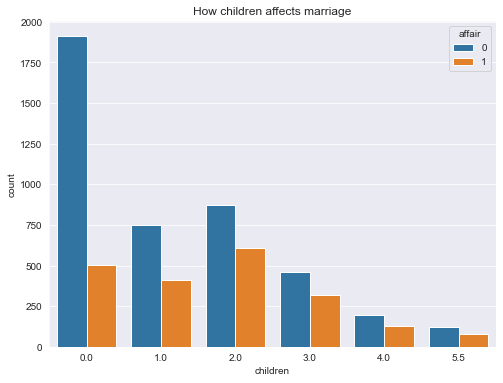

In [8]:
# How children effects marraige
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("children",data=df,hue="affair")
plt.title("How children affects marriage")
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


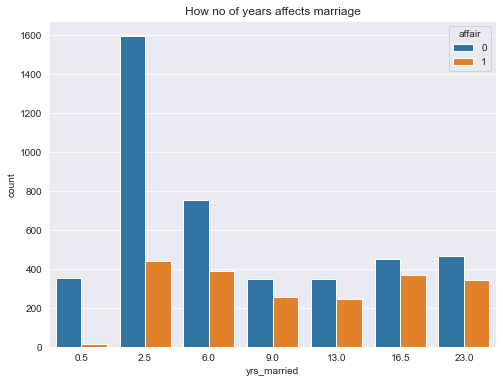

In [9]:
#years married
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("yrs_married",data=df,hue="affair")
plt.title("How no of years affects marriage")
plt.show()

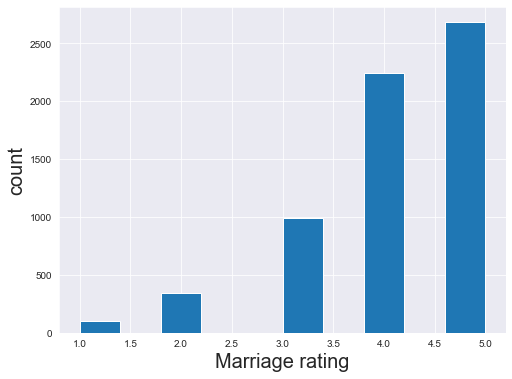

In [10]:
#Marraige Rating
plt.figure(figsize=(8,6))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


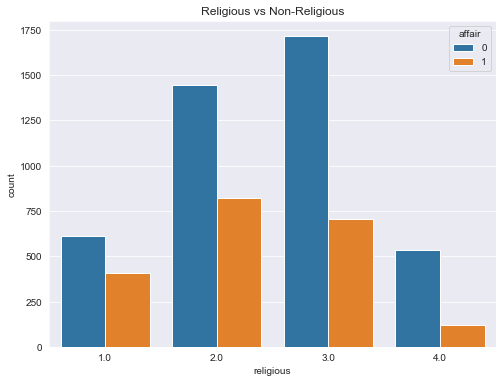

In [11]:
#Religious
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",data=df,hue="affair")
plt.title("Religious vs Non-Religious")
plt.show()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


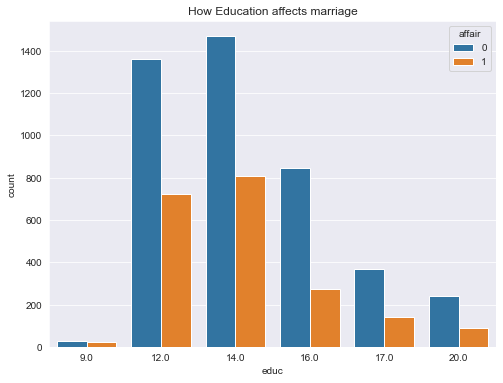

In [12]:
#Education
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",data=df,hue="affair")
plt.title("How Education affects marriage")
plt.show()

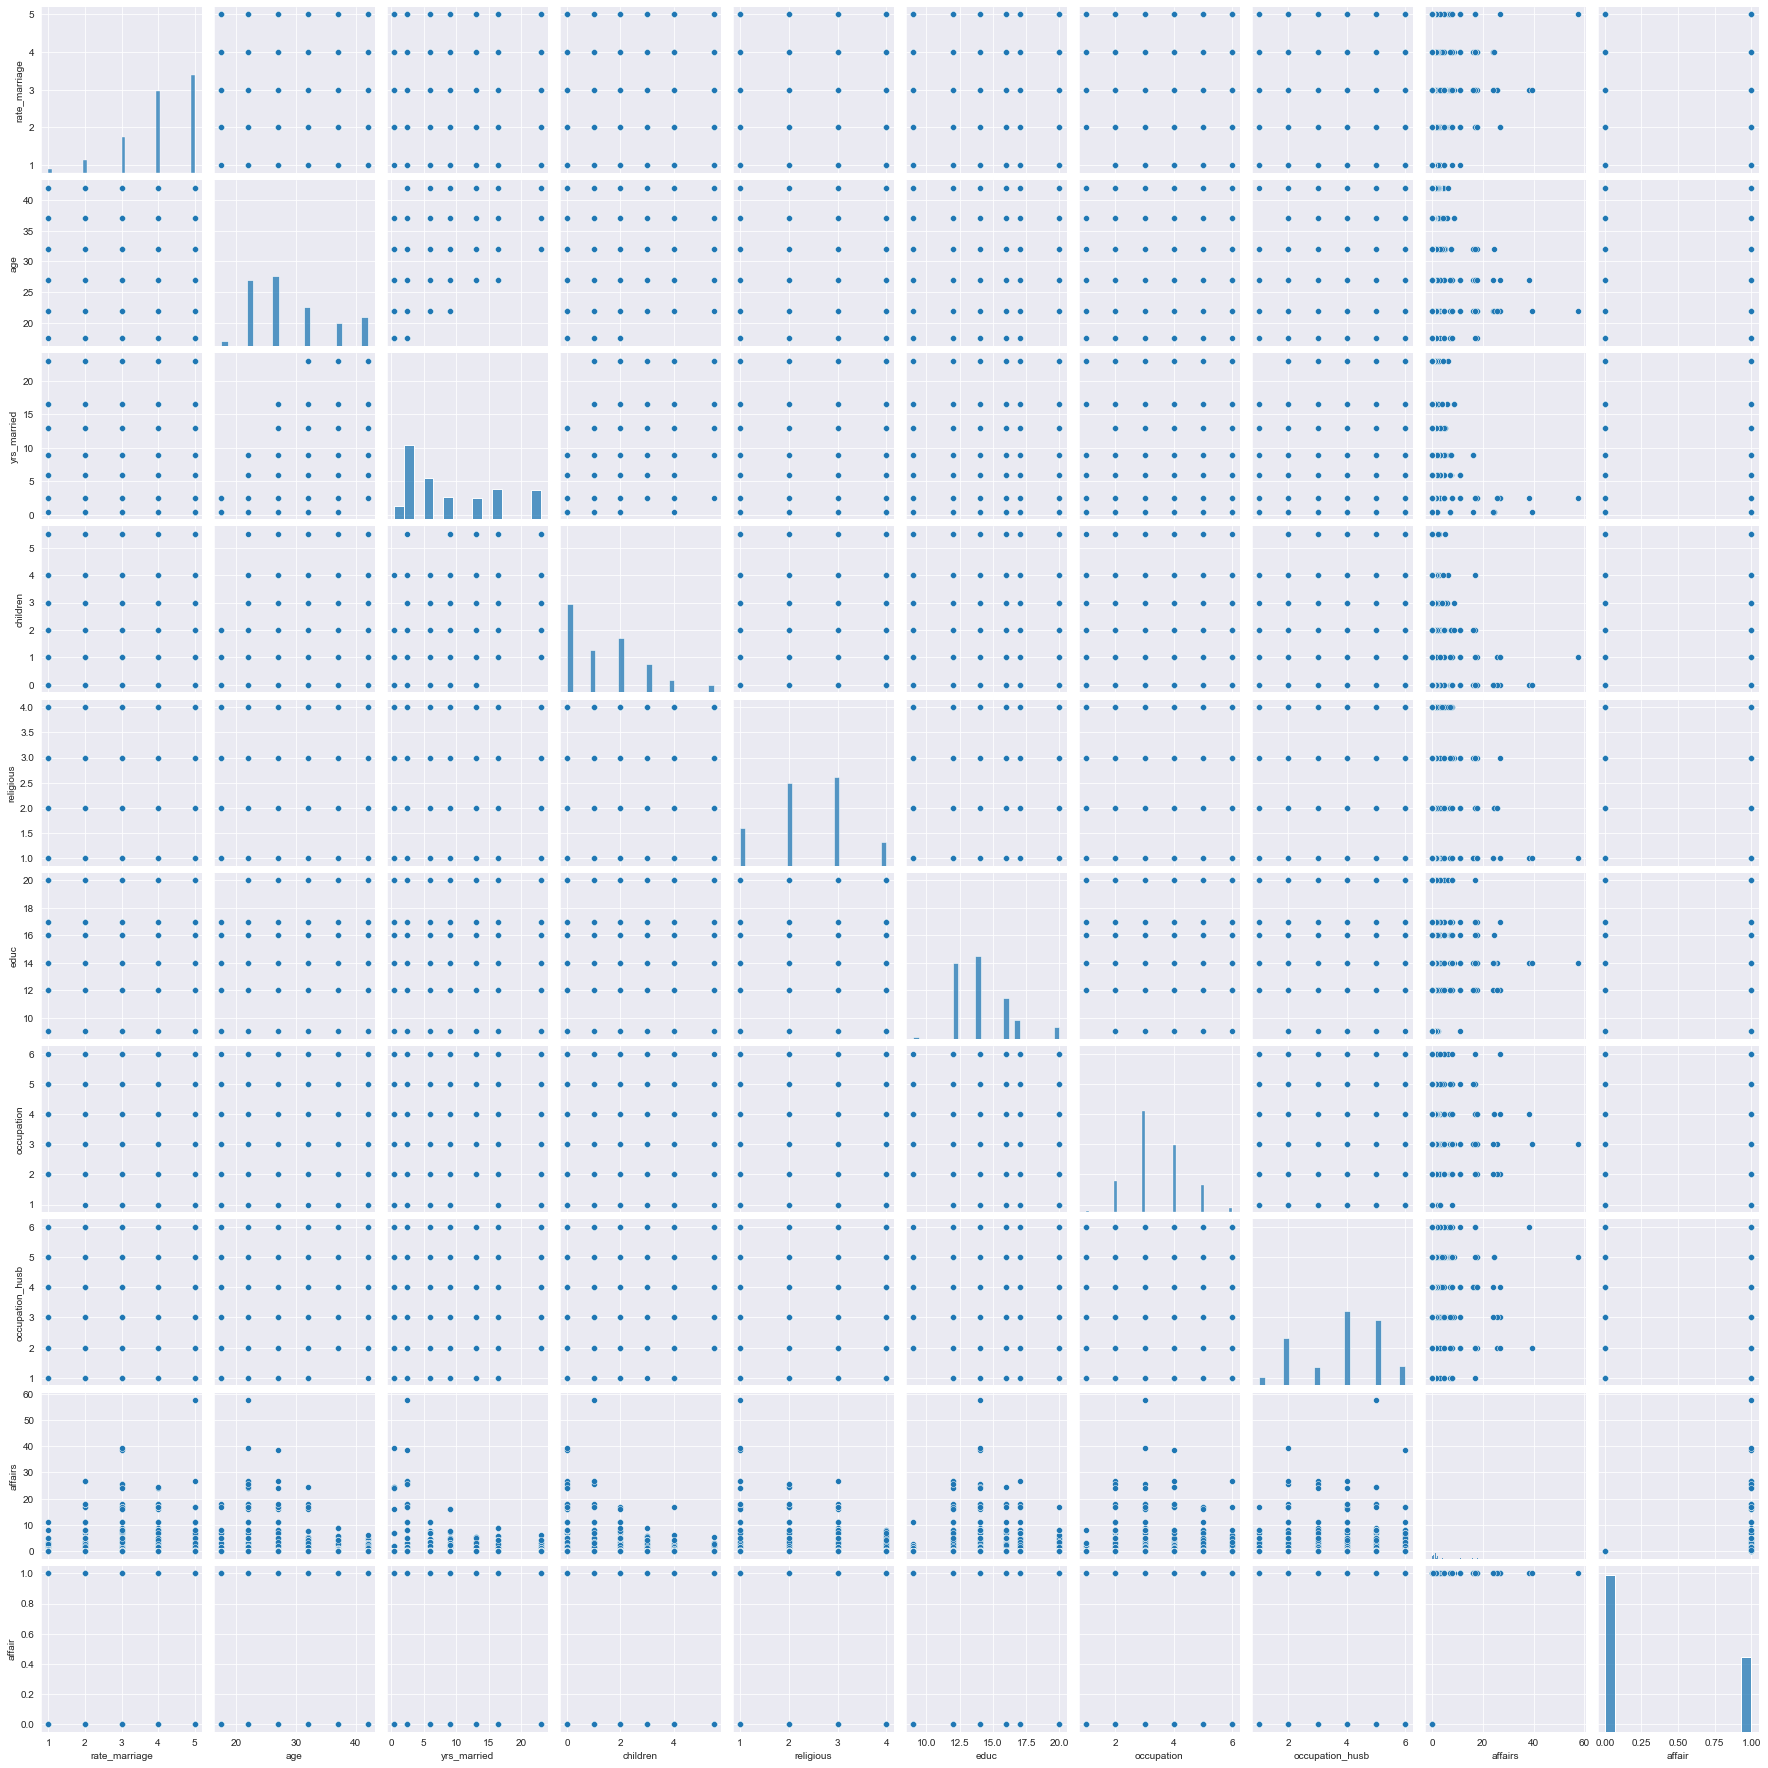

In [13]:
sns.pairplot(df)

Preparing dataset for applying Logistical Regression

In [14]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious + educ + C(occupation) + C(occupation_husb)', df, return_type="dataframe")

In [15]:
X.columns


Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [16]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [17]:
X

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [18]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [19]:
y = np.ravel(y)

In [20]:
y

array([1., 1., 1., ..., 0., 0., 0.])

# Logistic Regression

In [21]:
# run a logistic regression model, and fit with X and y 
model = LogisticRegression()
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.7255733584668552

73% accuracy seems good, but what's the null error rate?

In [22]:
# what percentage had affairs?
y.mean()

0.3224945020420987

Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

In [23]:
# examine the coefficients
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.40145923],
        [ 0.09413074],
        [ 0.3713048 ],
        [ 0.12211304],
        [ 0.73428393],
        [ 0.28089221],
        [ 0.28915682],
        [ 0.41944414],
        [ 0.24627223],
        [ 0.27406147],
        [ 0.28771128],
        [-0.6845293 ],
        [-0.05578739],
        [ 0.10799375],
        [-0.00914242],
        [-0.3728921 ],
        [ 0.00715386]]))

In [24]:
for item in zip(X.columns, np.transpose(model.coef_)):
    print(item)

('Intercept', array([1.40145923]))
('occ_2', array([0.09413074]))
('occ_3', array([0.3713048]))
('occ_4', array([0.12211304]))
('occ_5', array([0.73428393]))
('occ_6', array([0.28089221]))
('occ_husb_2', array([0.28915682]))
('occ_husb_3', array([0.41944414]))
('occ_husb_4', array([0.24627223]))
('occ_husb_5', array([0.27406147]))
('occ_husb_6', array([0.28771128]))
('rate_marriage', array([-0.6845293]))
('age', array([-0.05578739]))
('yrs_married', array([0.10799375]))
('children', array([-0.00914242]))
('religious', array([-0.3728921]))
('educ', array([0.00715386]))


Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both the wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

#  Let's split the data into a training set and a testing set.

In [25]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 0., 0.])

In [27]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.36041222, 0.63958778],
       [0.91213229, 0.08786771],
       [0.70859105, 0.29140895],
       ...,
       [0.52683937, 0.47316063],
       [0.82643453, 0.17356547],
       [0.74927112, 0.25072888]])

The classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

In [28]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7324607329842932
0.7456888867535443


The accuracy is 73%, which is the same as on training and predicting on the same data.

In [29]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 377  230]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1303
         1.0       0.63      0.38      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.72      0.73      0.71      1910



# Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [31]:
# evaluate the model using 10-fold cross-validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jitesh Chandani\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

(array([0.72213501, 0.69858713, 0.73469388, 0.70800628, 0.71585557,
        0.72684458, 0.72955975, 0.70597484, 0.74842767, 0.75314465]),
 0.7243229367218585)

It's still performing at 73% accuracy.

# Predicting the Probability of an Affair

Let's predict the probability of an affair for a random woman not present in the dataset. She's a 35-year-old professional who Advance Degree, has been married for 5 years, has 2 child, rates herself as strongly religious, rates her marriage as very good, and her husband is a professional with advanced degree.

In [36]:
X_train.head(2)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
2411,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,27.0,6.0,1.0,2.0,16.0
4083,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,42.0,23.0,4.0,3.0,14.0


In [40]:
model.predict_proba(np.array([[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 5, 35, 5, 2, 4,
                              20]]))

array([[0.94264901, 0.05735099]])

0.05735099 -----> 5% probablity only

In [41]:
import pickle
pickle.dump(model, open('model.pickle', 'wb'))